In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from tqdm import tqdm_notebook


In [6]:
def sigmoid(x,w,b):
    return 1/(1+ np.exp(-(w*x+b)))

<function matplotlib.pyplot.show(close=None, block=None)>

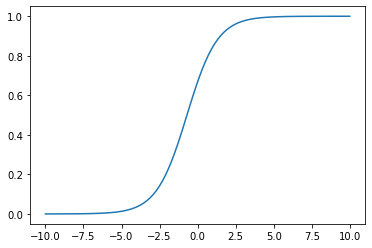

In [10]:
w = 1.
b = 0.7 
x = np.linspace(-10,10,100)
y = sigmoid(x,w,b)

plt.plot(x,y)
plt.show

In [13]:
def sigmoid_2d(x,w1,w2,b1,b2):
    return (1/(1+(np.exp(-(w1*x+w2*x+b1+b2)))))


<function matplotlib.pyplot.show(close=None, block=None)>

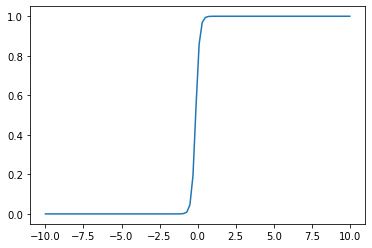

In [14]:
w1 = 5 
w2 = 3
b1=0.5
b2=0.8
x = np.linspace(-10,10,100)

y = sigmoid_2d(x,w1,w2,b1,b1)

plt.plot(x,y)
plt.show

In [43]:
class SigmoidNeuron :
    def __init__(self):
        self.w = None 
        self.b = None 
        
    def perceptron(self,x):
        return np.dot(x,self.w.T) + self.b 
    
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))

    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)*x
    
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)
    
    def fit(self,X,Y,epochs=1,learning_rate=1,initialise=True,display_loss=False):
         
         if initialise:
             self.w = np.random.randn(1,X.shape[1])
             self.b = 0
             
         if display_loss:
            loss = {}
            
         for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
            dw = 0 
            db = 0
            for x,y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
            self.w -= learning_rate *dw
            self.b -= learning_rate *db
            
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y_pred,Y)
                
         if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
            
                   

In [49]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"]) #this gives the colors in order of the size of cluster


In [51]:
data,labels = make_blobs(n_samples=1000,centers=5,n_features=4,random_state=0)
print(data.shape,labels.shape)

(1000, 4) (1000,)


ValueError: x and y must be the same size

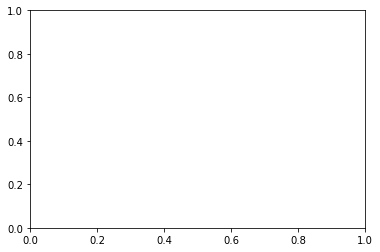

In [52]:

plt.scatter(data,labels)
plt.show()


In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify=labels,random_state=0)

In [44]:
sn = SigmoidNeuron()
sn.fit(X_train,Y_train,epochs=1,learning_rate=1,initialise=True,display_loss=False)

C:\Users\Ruchita Gayatri\AppData\Local\Temp\ipykernel_4520\2511623116.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):


  0%|          | 0/1 [00:00<?, ?epoch/s]

In [ ]:
class FFNetwork:
    
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self,x):
        self.x1 , self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2 *self.x2 +self.b1